In [2]:
#Business Objective: Segregate patients depending on their age group and other factors as given in the data

#Constraint: Various factors affecting towards the Heart disease


In [ ]:
"""# Data Dictionary to understand the columns:

A Pharmaceutical drug manufacturing company is studying on a new medicine to treat Heart diseases, it has gathered data from its secondary sources.
*   age:age
*   sex:1: male, 0: female
*   cp:chest pain type1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
*   trestbps:resting blood pressure
*   chol:serum cholestoral in mg/dl
*   fbs:fasting blood sugar > 120 mg/dl
*   restecg:resting electrocardiographic results (values 0,1,2)
*   thalach: maximum heart rate achieved
*   exang:exercise induced angina
*   oldpeak:oldpeak = ST depression induced by exercise relative to rest
*   slope:the slope of the peak exercise ST segment
*   ca:number of major vessels (0-3) colored by flourosopy
*   thal:thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
"""

In [3]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np   # math calculations
import seaborn as sns  # advance visualizations

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
heart = pd.read_csv("heart disease.csv")

In [8]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Columns in the dataset
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

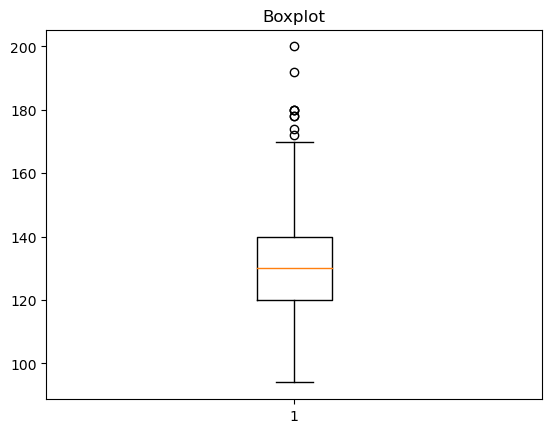

In [11]:
# Outier Detection 
plt.boxplot(heart.trestbps);
plt.title('Boxplot');
plt.show() 

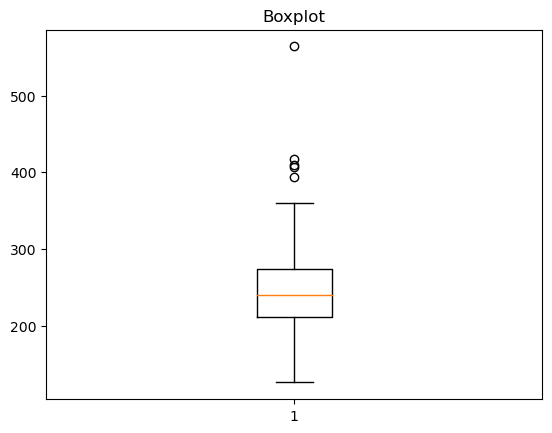

In [12]:
plt.boxplot(heart.chol);plt.title('Boxplot');plt.show()  # outliers present

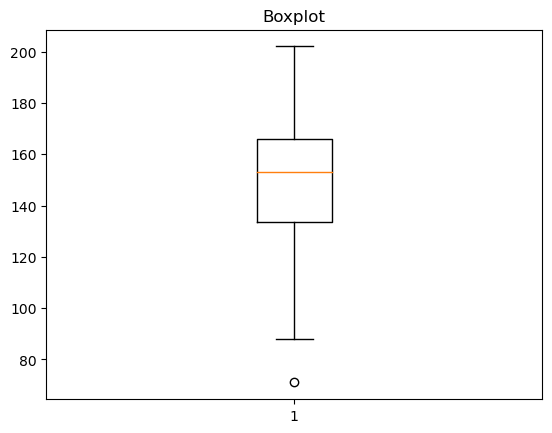

In [13]:
plt.boxplot(heart.thalach);
plt.title('Boxplot');
plt.show()  # outliers present

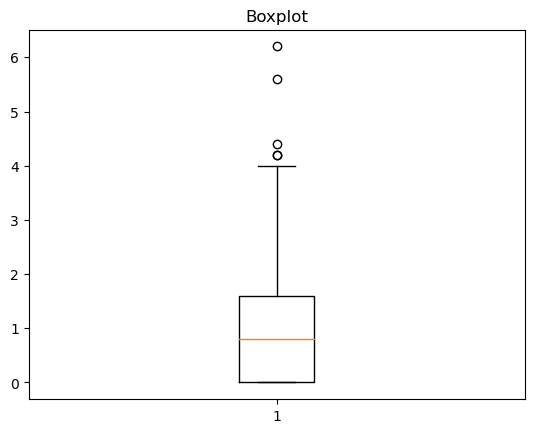

In [14]:
plt.boxplot(heart.oldpeak);
plt.title('Boxplot');
plt.show()  # outliers present

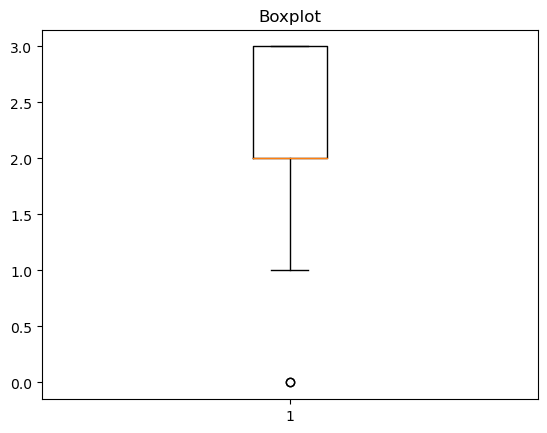

In [15]:
plt.boxplot(heart.thal);
plt.title('Boxplot');
plt.show()  # outliers present

In [16]:
# Outlier Treatment: Winsorization
from scipy.stats.mstats import winsorize

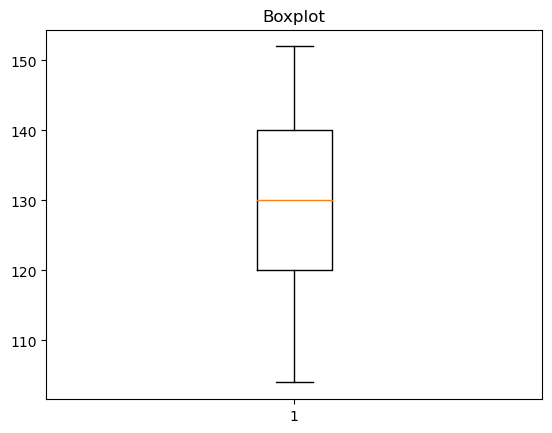

In [17]:
heart['trestbps'] = winsorize(heart.trestbps, limits = [0.03, 0.097])   
plt.boxplot(heart['trestbps']);
plt.title('Boxplot');
plt.show()

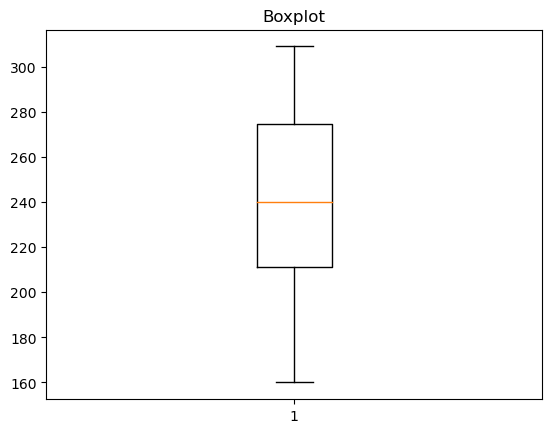

In [18]:
heart['chol'] = winsorize(heart.chol, limits = [0.02, 0.098])   
plt.boxplot(heart['chol']);
plt.title('Boxplot');
plt.show()

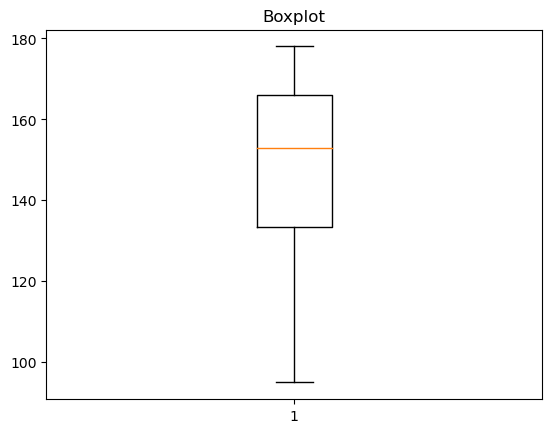

In [19]:
heart['thalach'] = winsorize(heart.thalach, limits = [0.01, 0.099])   
plt.boxplot(heart['thalach']);
plt.title('Boxplot');
plt.show()

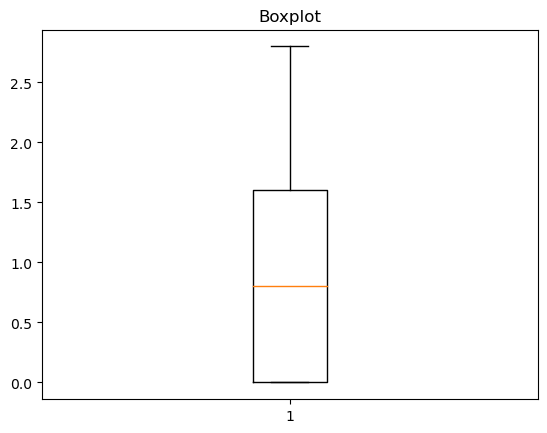

In [20]:
heart['oldpeak'] = winsorize(heart.oldpeak, limits = [0.02, 0.098])   
plt.boxplot(heart['oldpeak']);
plt.title('Boxplot');
plt.show()

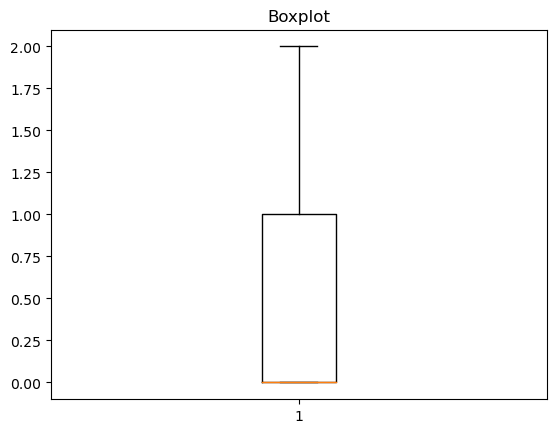

In [21]:
heart['ca'] = winsorize(heart.ca, limits = [0.08, 0.092])   
plt.boxplot(heart['ca']);
plt.title('Boxplot');
plt.show()

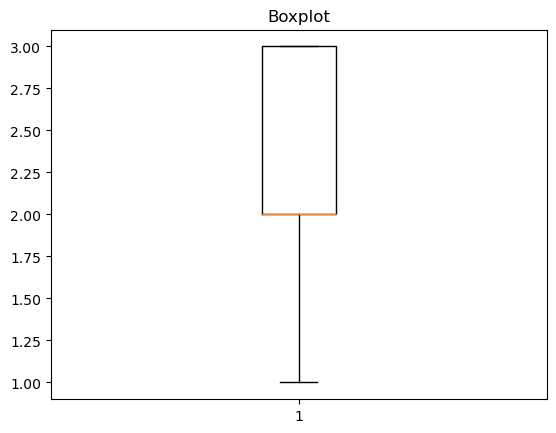

In [22]:
heart['thal'] = winsorize(heart.thal, limits = [0.01, 0.099])   
plt.boxplot(heart['thal']);
plt.title('Boxplot');
plt.show()

In [23]:
# Normalization
from sklearn import preprocessing   # package for normalize function
heart_normalized = preprocessing.normalize(heart)
print(heart_normalized)

[[0.19745308 0.00313418 0.00940253 ... 0.         0.00313418 0.00313418]
 [0.1103265  0.0029818  0.00596359 ... 0.         0.00596359 0.0029818 ]
 [0.13682414 0.         0.00333717 ... 0.         0.00667435 0.00333717]
 ...
 [0.23672432 0.00348124 0.         ... 0.00696248 0.01044372 0.        ]
 [0.23468629 0.0041173  0.         ... 0.0041173  0.01235191 0.        ]
 [0.1749685  0.         0.00306962 ... 0.00306962 0.00613925 0.        ]]


(array([175.,   0.,   0.,   0.,   0.,  65.,   0.,   0.,   0.,  63.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

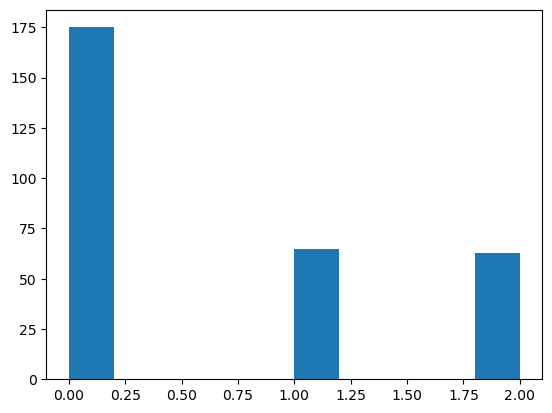

In [24]:
# Univariate, and Bivariate Analysis
plt.hist(heart["ca"])

(array([14., 18., 31., 33., 42., 36., 31., 28., 20., 50.]),
 array([160. , 174.9, 189.8, 204.7, 219.6, 234.5, 249.4, 264.3, 279.2,
        294.1, 309. ]),
 <BarContainer object of 10 artists>)

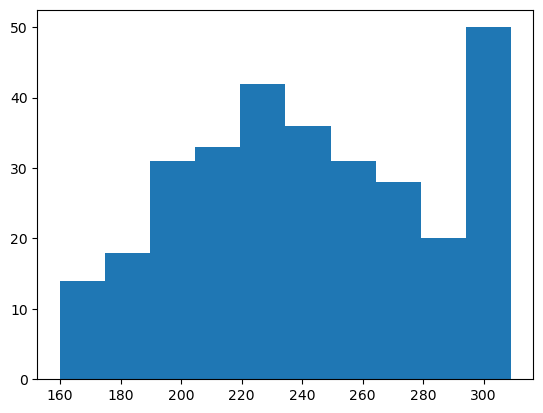

In [25]:
plt.hist(heart["chol"])

Text(0, 0.5, 'chol')

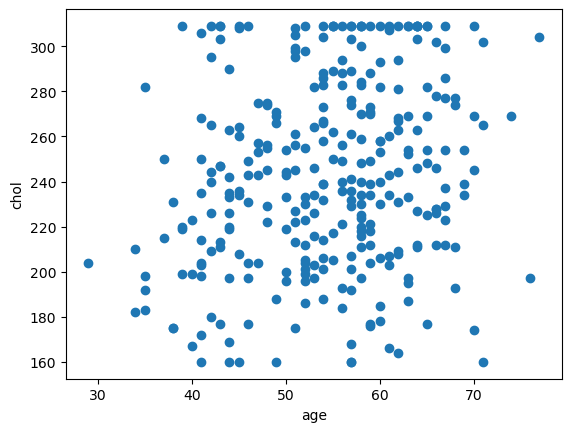

In [26]:
plt.scatter(heart["age"], heart["chol"]);
plt.xlabel('age');
plt.ylabel('chol')  # Bivariate

In [27]:
heart.skew(axis = 0, skipna = True) 

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps   -0.040918
chol        0.004708
fbs         1.986652
restecg     0.162522
thalach    -0.621428
exang       0.742532
oldpeak     0.634619
slope      -0.508316
ca          0.769871
thal       -0.235686
target     -0.179821
dtype: float64

In [28]:
heart.kurtosis(axis = 0, skipna = True)

age        -0.542167
sex        -1.382961
cp         -1.193071
trestbps   -0.975697
chol       -0.932861
fbs         1.959678
restecg    -1.362673
thalach    -0.431112
exang      -1.458317
oldpeak    -0.930512
slope      -0.627521
ca         -1.033172
thal       -0.629079
target     -1.980783
dtype: float64

In [29]:
## Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 

In [30]:
# Measuring Pairwise Distances
z = linkage(heart_normalized, method = "complete", metric = "euclidean")

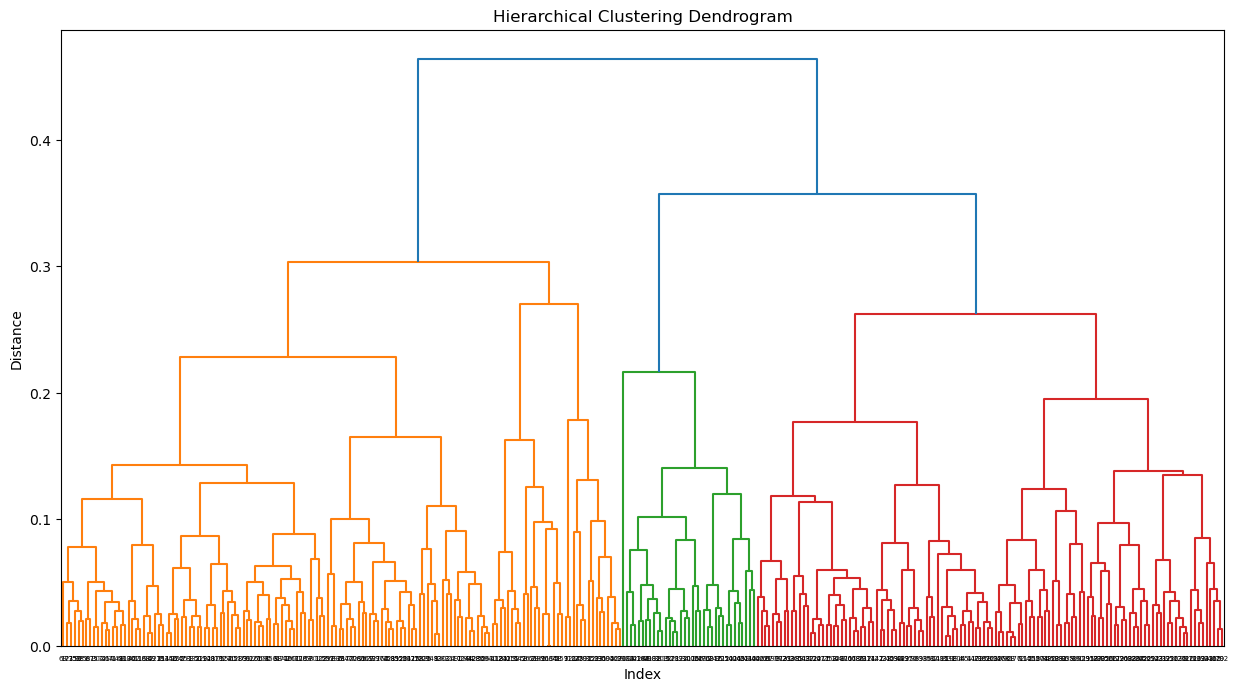

In [31]:
## Dendogram
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');
plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation = 0,  leaf_font_size = 5 )  
plt.show()

In [32]:
# Apply AgglomerativeClustering for creating 3 clusters (reference the above dendrogram)
from sklearn.cluster import AgglomerativeClustering

In [33]:
h_complete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete', affinity = "euclidean").fit(heart_normalized) 
h_complete.labels_

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 2, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0,
       1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0,

In [34]:
cluster_labels = pd.Series(h_complete.labels_)

heart['clust'] = cluster_labels # creating a new column and assigning it to new column 

heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,clust
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,178,0,2.8,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,309,0,1,163,1,0.6,2,0,2,1,1


In [35]:
# Aggregate mean of each cluster
heart.iloc[:, 0:].groupby(heart.clust).mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,clust
clust,,,,,,,,,,,,,,,
0,50.623288,0.719178,1.123288,130.328767,215.109589,0.150685,0.616438,159.965753,0.232877,0.778767,1.486301,0.452055,2.287671,0.678082,0.0
1,56.803279,0.639344,0.729508,127.524590,280.631148,0.139344,0.442623,142.713115,0.434426,1.043443,1.368852,0.778689,2.385246,0.418033,1.0
2,61.485714,0.685714,1.142857,139.400000,227.657143,0.171429,0.457143,127.057143,0.342857,1.454286,1.142857,0.857143,2.228571,0.428571,2.0


In [36]:
## K means clustering
from sklearn.cluster import	KMeans

In [37]:
df_data = pd.DataFrame(heart, columns=['age','chol'])
print(df_data)

     age  chol
0     63   233
1     37   250
2     41   204
3     56   236
4     57   309
..   ...   ...
298   57   241
299   45   264
300   68   193
301   57   160
302   57   236

[303 rows x 2 columns]


<AxesSubplot:xlabel='age', ylabel='chol'>

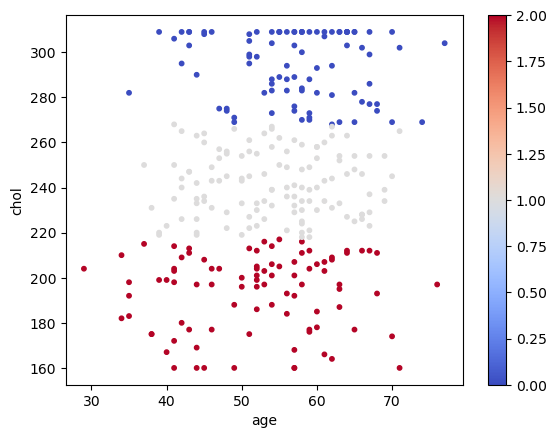

In [38]:
model1 = KMeans(n_clusters = 3).fit(df_data)
df_data.plot(x = "age", y = "chol", c = model1.labels_, kind="scatter", s = 10, cmap = plt.cm.coolwarm)

In [39]:
## scree plot or elbow curve
TWSS = []
k = list(range(2, 9))

In [40]:
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(heart_normalized)
    TWSS.append(kmeans.inertia_)
    
TWSS

[2.1666848087242965,
 1.6906633813131662,
 1.2944028247988046,
 1.0698708134673347,
 0.9422805536359273,
 0.8315578718021042,
 0.7559904736221638]

Text(0, 0.5, 'total_within_SS')

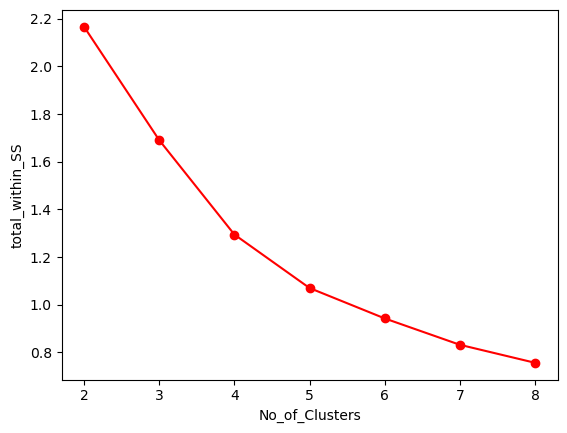

In [41]:
# Scree Plot or Elbow Curve
plt.plot(k, TWSS, 'ro-');
plt.xlabel("No_of_Clusters");
plt.ylabel("total_within_SS")

In [42]:
# Selecting 4 clusters in reference to the above scree plot as the optimum number of clusters 
model = KMeans(n_clusters = 4)
model.fit(heart_normalized)

KMeans(n_clusters=4)

In [43]:
model.labels_ # Getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # Converting numpy array into pandas series object 
heart['clust'] = mb # Creating a  new column and assigning it to new column 
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,clust
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,178,0,2.8,0,0,2,1,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,309,0,1,163,1,0.6,2,0,2,1,2


In [44]:
heart.iloc[:, :].groupby(heart.clust).mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
clust,,,,,,,,,,,,,,
0,59.342857,0.700000,0.885714,137.214286,217.428571,0.171429,0.514286,134.171429,0.428571,1.342857,1.185714,0.700000,2.285714,0.428571
1,48.175000,0.712500,1.350000,129.325000,204.000000,0.112500,0.675000,166.100000,0.125000,0.626250,1.600000,0.387500,2.225000,0.775000
2,53.389474,0.684211,0.989474,124.115789,266.547368,0.157895,0.473684,159.715789,0.263158,0.664211,1.547368,0.568421,2.326316,0.621053
3,58.500000,0.620690,0.500000,133.155172,288.775862,0.155172,0.431034,126.896552,0.586207,1.460345,1.137931,0.982759,2.482759,0.241379


In [45]:
##### Principle Component Analysis (PCA)
heart = pd.read_csv("heart disease.csv")
heart.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [46]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [47]:
# Winsorization
from scipy.stats.mstats import winsorize

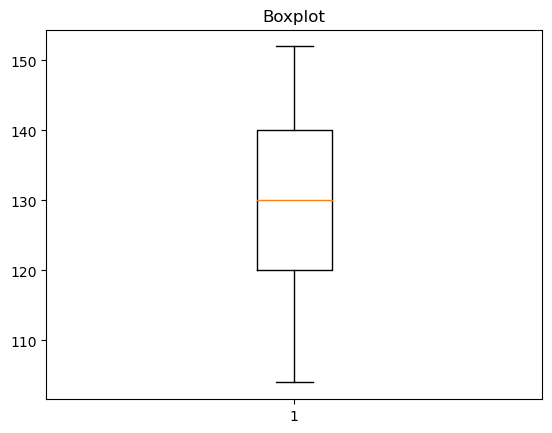

In [48]:
heart['trestbps']=winsorize(heart.trestbps,limits=[0.03, 0.097])   
plt.boxplot(heart['trestbps']);
plt.title('Boxplot');
plt.show()

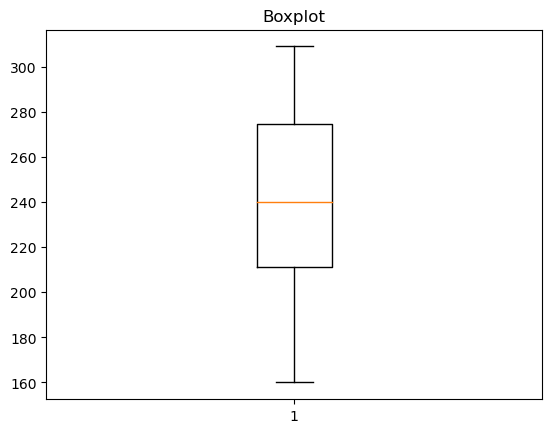

In [49]:
heart['chol']=winsorize(heart.chol,limits=[0.02, 0.098])   
plt.boxplot(heart['chol']);plt.title('Boxplot');plt.show()

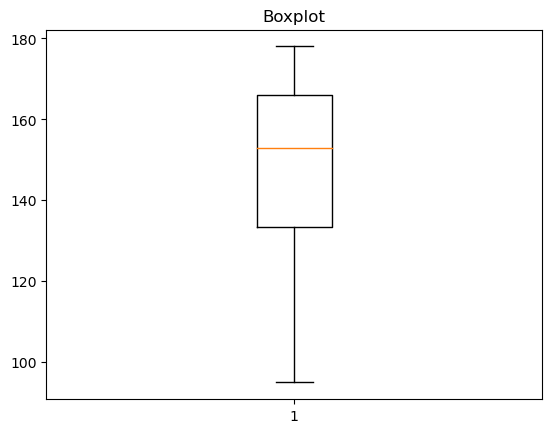

In [50]:
heart['thalach']=winsorize(heart.thalach,limits=[0.01, 0.099])   
plt.boxplot(heart['thalach']);plt.title('Boxplot');plt.show()

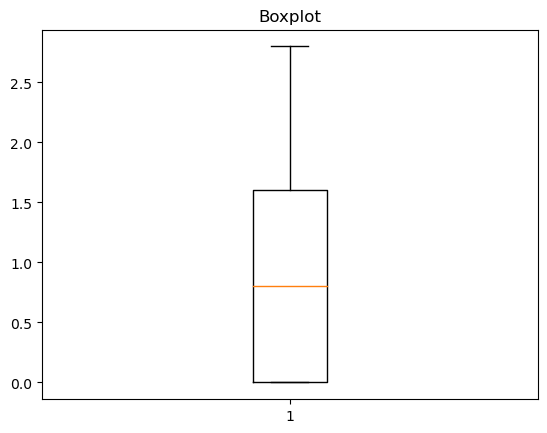

In [51]:
heart['oldpeak']=winsorize(heart.oldpeak,limits=[0.02, 0.098])   
plt.boxplot(heart['oldpeak']);plt.title('Boxplot');plt.show()

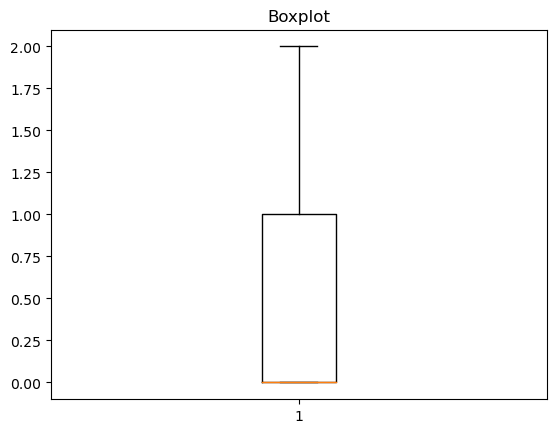

In [52]:
heart['ca']=winsorize(heart.ca,limits=[0.08, 0.092])   
plt.boxplot(heart['ca']);plt.title('Boxplot');plt.show()

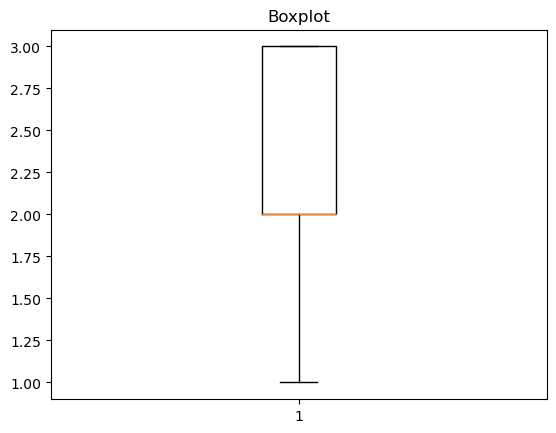

In [53]:
heart['thal']=winsorize(heart.thal,limits=[0.01, 0.099])   
plt.boxplot(heart['thal']);plt.title('Boxplot');plt.show()

In [54]:
# Normalizing the numerical data 
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
heart_normal = scale(heart)
heart_normal

pca = PCA(n_components = 14)
pca_values = pca.fit_transform(heart_normalized)

In [55]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

pca.components_
pca.components_[0]

array([ 2.24266746e-02,  2.70042448e-03,  1.00414313e-02,  3.03632864e-01,
       -6.26649425e-01,  2.61981007e-04,  3.77244440e-03,  7.17189308e-01,
       -3.34567178e-03, -3.77053866e-03,  6.97254677e-03, -3.73761480e-03,
        2.78416593e-03,  5.99599512e-03])

In [56]:
# Cumulative variance 

var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

array([ 68.67,  94.35,  99.43,  99.69,  99.78,  99.85,  99.89,  99.92,
        99.94,  99.96,  99.97,  99.98,  99.99, 100.  ])

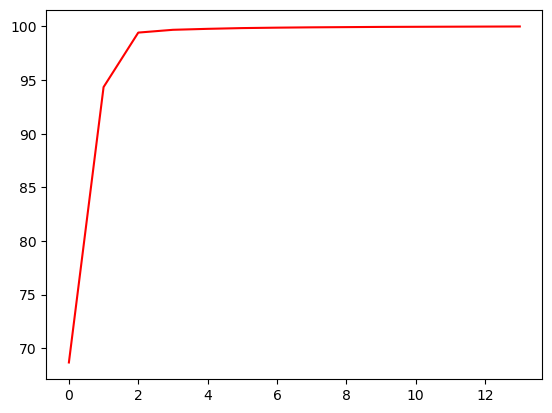

In [57]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

In [58]:
# PCA scores
pca_values

array([[ 2.93996675e-02,  4.75288605e-02,  7.34240914e-03, ...,
        -1.21797134e-03,  1.89750313e-03,  1.74347726e-04],
       [ 4.11037547e-02, -6.88121292e-02, -3.99903395e-02, ...,
        -1.43075732e-03,  4.70406598e-05,  1.31887892e-03],
       [ 1.27274148e-01, -3.31363082e-02, -2.70326689e-02, ...,
         6.95764943e-04,  2.07712781e-04, -3.71185865e-04],
       ...,
       [ 9.58657808e-02,  9.89345316e-02,  2.93016631e-02, ...,
        -2.15609171e-03,  2.74283258e-03, -1.01939018e-03],
       [ 1.01918516e-01,  1.34993876e-01,  1.26572293e-02, ...,
         1.15344331e-03, -5.66316688e-04,  4.41448751e-04],
       [ 6.15727005e-02, -3.36912695e-02,  1.56303132e-02, ...,
         2.84358766e-04, -1.65529652e-03, -1.64086747e-03]])

In [59]:
pca_data = pd.DataFrame(pca_values)
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5","comp6","comp7","comp8","comp9","comp10","comp11","comp12","comp13"
final = pd.concat([heart, pca_data.iloc[:, 0:3]], axis = 1)

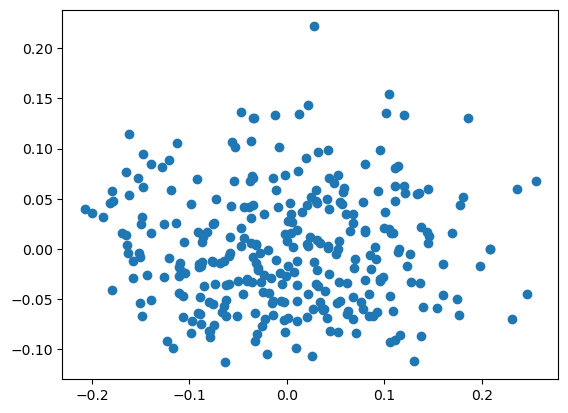

In [60]:
# Scatter diagram
plt.scatter(x = final.comp0, y = final.comp1)

In [61]:
### Hierarchical Clustering post PCA
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 

In [62]:
## Fidning Distance
z = linkage(pca_data, method = "complete", metric = "euclidean")

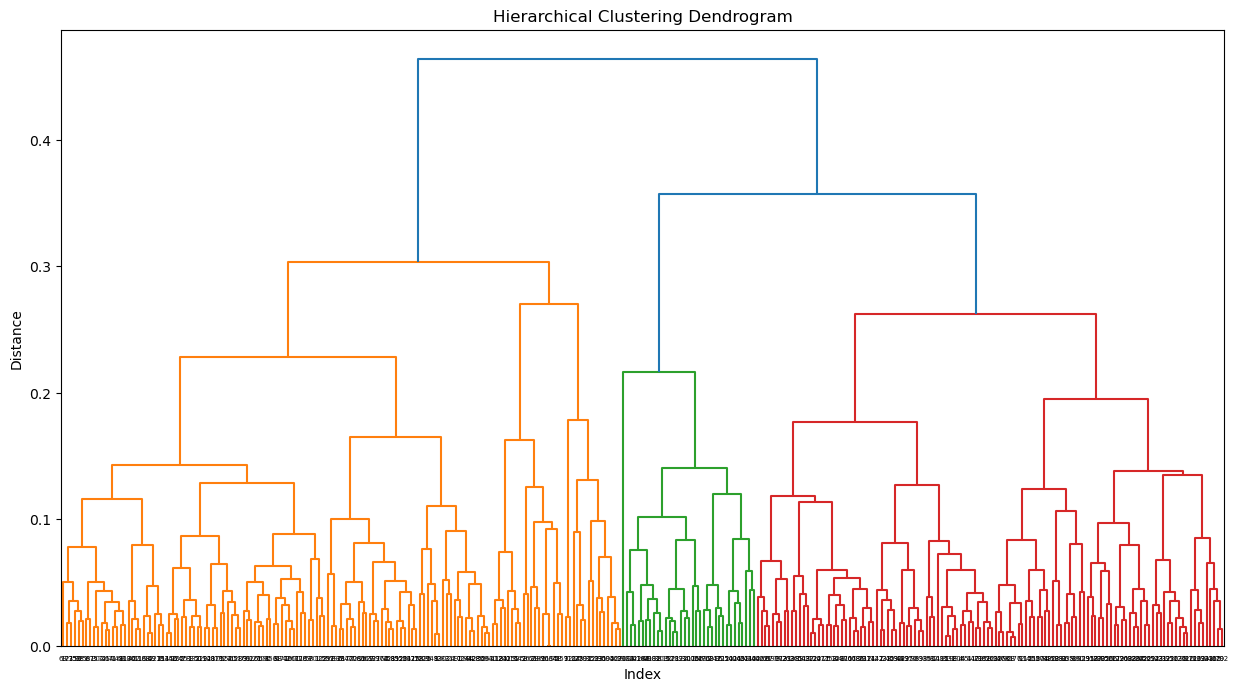

In [63]:
## Dendogram
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation = 0,  leaf_font_size = 5 )  
plt.show()

In [64]:
# Apply AgglomerativeClustering choosing 3 as clusters from the above dendrogram
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete', affinity = "euclidean").fit(pca_data) 
h_complete.labels_

cluster_labels = pd.Series(h_complete.labels_)

pca_data['clust'] = cluster_labels

In [65]:
# Aggregate mean of each cluster
pca_data.iloc[:, 0:].groupby(pca_data.clust).mean()

,comp0,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,comp11,comp12,comp13,clust
clust,,,,,,,,,,,,,,,
0,0.078326,-0.005360,-0.003321,-0.000430,-0.000210,-0.000083,-0.000104,-0.000098,0.000074,-0.000080,0.000019,-1.856895e-07,0.000043,0.000025,0.0
1,-0.088589,-0.015806,0.002701,0.001507,-0.000047,-0.000106,0.000030,0.000054,-0.000150,0.000035,0.000008,4.721591e-05,-0.000025,-0.000065,1.0
2,-0.017938,0.077454,0.004441,-0.003457,0.001041,0.000718,0.000330,0.000220,0.000214,0.000211,-0.000109,-1.638066e-04,-0.000092,0.000121,2.0


In [66]:
#### K means clustering
from sklearn.cluster import	KMeans

In [67]:
# scree plot or elbow curve 
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pca_data)
    TWSS.append(kmeans.inertia_)
    
TWSS

[29.476320529137894,
 1.9057530785756467,
 1.5283343416664166,
 1.1887352639394657,
 0.9871186226118945,
 0.8930671961563925,
 0.8027511185838448]

Text(0, 0.5, 'total_within_SS')

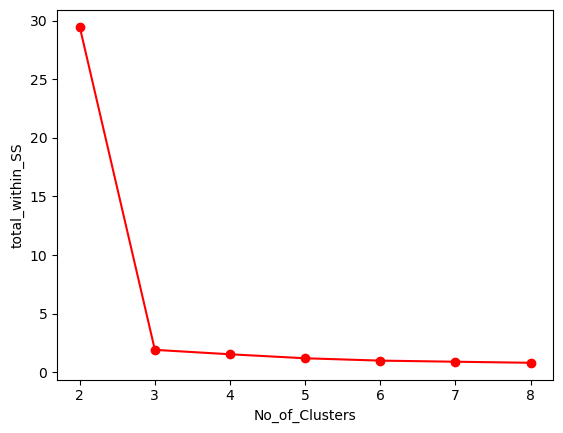

In [68]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [69]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)
model.fit(pca_data)
model.labels_ # Getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # Converting numpy array into pandas series object 
pca_data['clust'] = mb # Creating a  new column and assigning it to new column 
pca_data.head()
pca_data.iloc[:, :].groupby(pca_data.clust).mean()

,comp0,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,comp11,comp12,comp13
clust,,,,,,,,,,,,,,
0,0.078326,-0.005360,-0.003321,-0.000430,-0.000210,-0.000083,-0.000104,-0.000098,0.000074,-0.000080,0.000019,-1.856895e-07,0.000043,0.000025
1,-0.088589,-0.015806,0.002701,0.001507,-0.000047,-0.000106,0.000030,0.000054,-0.000150,0.000035,0.000008,4.721591e-05,-0.000025,-0.000065
2,-0.017938,0.077454,0.004441,-0.003457,0.001041,0.000718,0.000330,0.000220,0.000214,0.000211,-0.000109,-1.638066e-04,-0.000092,0.000121


In [ ]:
"""
If we take Hierarchical clustering, Cluster 3 people are more prone to heart disease.

Cluster 3 > Cluster 1> Cluster 2

If we take K means clustering, Cluster 3 people are more prone to heart disease

Cluster 3 > Cluster 1 > Cluster 2 > Cluster 4
"""